# Proyecto ICH1104 - Mecánica de Fluidos

Integrantes:
* Pablo Carrasco
* Benjamín Rendic
* Andrés Reyes
* Daniel Sebastián

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [3]:
data = scipy.io.loadmat('data.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'D', 'U0', 'c', 'f', 'nu', 'rho', 'u', 'v', 'x', 'y'])

## Procesamiento de datos

In [4]:
u = data['u']
v = data['v']
x = data['x']
y = data['y']

f = data['f'][0][0]
D = data['D'][0][0]
U0 = data['U0'][0][0]
nu = data['nu'][0][0]
rho = data['rho'][0][0]

### Tratamiento de *outliers* y reemplazo de vectores

In [37]:
def replace_outliers(arr, k=1.5):
    
    q1 = np.percentile(arr, 25) #Primer cuartil
    q3 = np.percentile(arr, 75) #Tercer cuartil
    inter_q = q3 - q1   #Rango intercuartil

    lower_limit = q1 - k * inter_q  #Límite inferior
    upper_limit = q3 + k * inter_q  #Límite superior

    replaced_arr = np.copy(arr)
    replaced_arr[(arr < lower_limit) | (arr > upper_limit)] = np.mean(arr)  #Reemplaza outliers por la media

    return replaced_arr

#### Corrección de u

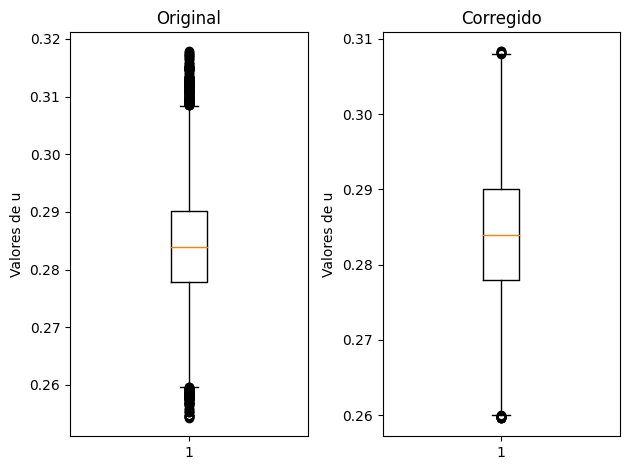

In [30]:
fig,axis=plt.subplots(1,2)

plt.sca(axis[0])
plt.boxplot(np.mean(u, axis=(0,1)))
plt.ylabel('Valores de u')
plt.title('Original')

plt.sca(axis[1])
plt.boxplot(replace_outliers(np.mean(u, axis=(0,1)), k=1.5))
plt.ylabel('Valores de u')
plt.title('Corregido')

plt.tight_layout()
plt.show()

#### Correción de v

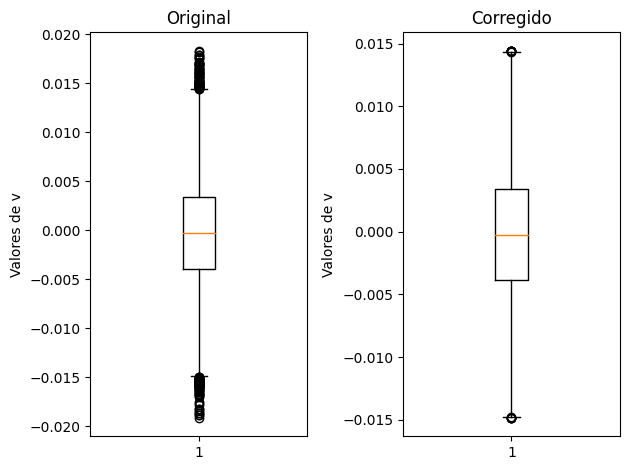

In [31]:
fig,axis=plt.subplots(1,2)

plt.sca(axis[0])
plt.boxplot(np.mean(v, axis=(0,1)))
plt.ylabel('Valores de v')
plt.title('Original')

plt.sca(axis[1])
plt.boxplot(replace_outliers(np.mean(v, axis=(0,1)), k=1.5))
plt.ylabel('Valores de v')
plt.title('Corregido')

plt.tight_layout()
plt.show()

In [6]:
u_mean_space = np.mean(u, axis=(0,1)) # Promedio de velocidad u en el  espacio en cada momento de los 39999
v_mean_space = np.mean(v, axis=(0,1)) # Promedio de velocidad v en el  espacio en cada momento de los 39999
vel_mean=np.linalg.norm((u_mean_space, v_mean_space), axis=0)

N=len(vel_mean)
t=1/f
dt=t
t_=dt*np.arange(N)

In [7]:
u_mean_space_clean = replace_outliers(u_mean_space)
v_mean_space_clean = replace_outliers(v_mean_space)

## Velocidad Media y Campo de Vorticidad Medio

### Velocidad Media Longitudinal


Text(0, 0.5, 'Velocidad u [m/s] ')

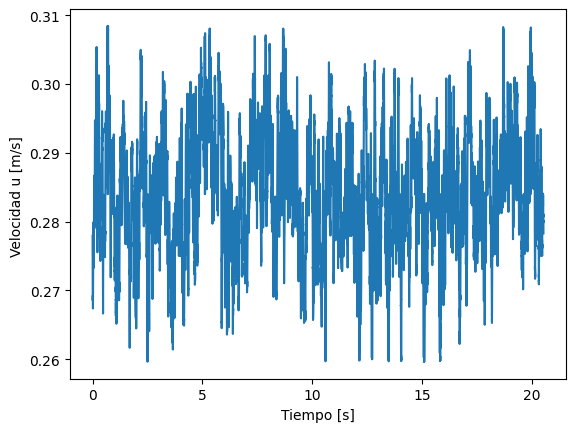

In [8]:
plt.plot(t_,u_mean_space_clean)
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad u [m/s] ')

In [9]:
u_max = max(u_mean_space_clean)
u_min = min(u_mean_space_clean)
print(f'La velocidad u fluctúa entre {u_min} y {u_max}')

La velocidad u fluctúa entre 0.2596156781935401 y 0.30844358966589486


### Velocidad Media Transversal

Text(0, 0.5, 'Velocidad v [m/s] ')

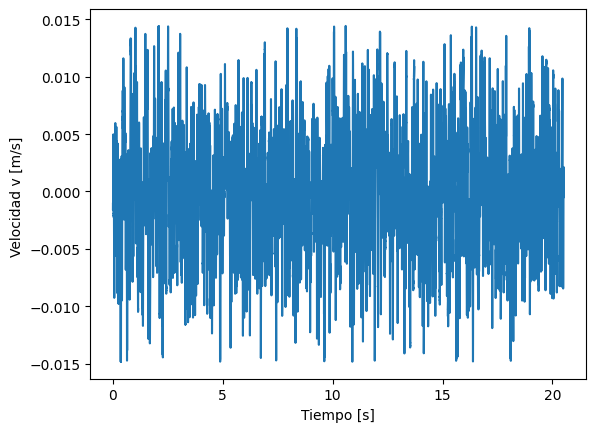

In [38]:
plt.plot(t_,v_mean_space_clean)
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad v [m/s] ')

In [11]:
v_max = max(v_mean_space_clean)
v_min = min(v_mean_space_clean)
print(f'La velocidad v fluctúa entre {v_min} y {v_max}')

La velocidad v fluctúa entre -0.014855613738393328 y 0.014431377434942173


### Campo de Vorticidad Medio

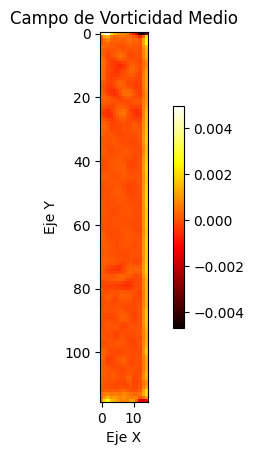

In [33]:
# vorticidad = wz = (dv/dx)-(du/dy)
dudy = np.gradient(u, axis=1)
dvdx = np.gradient(v, axis=0)
dudy_mean = np.mean(dudy,axis=2)
dvdx_mean = np.mean(dvdx,axis=2)
wz = dvdx_mean-dudy_mean

plt.imshow(wz, cmap='hot')
plt.colorbar(shrink=0.6)
plt.title('Campo de Vorticidad Medio')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.show()

## Tensiones de corte en la pared

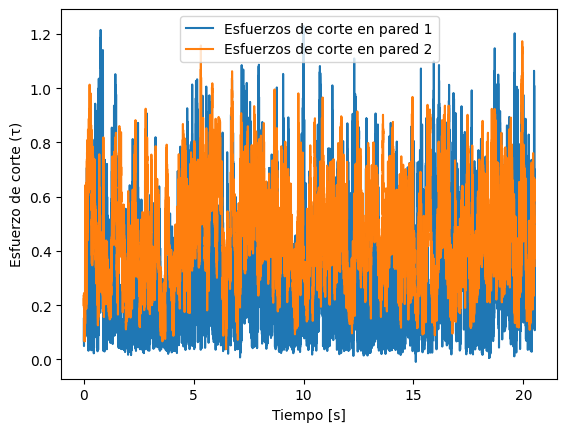

In [40]:
# tau = mu * (du/dy)
# mu = rho * nu
position_to_meter = (21/116)*(1/1000)
mu = rho * nu
u_mean_near1 = np.mean(u[0], axis=0)
u_mean_near2 = np.mean(u[115], axis=0)

tau_x1 = mu * (u_mean_near1/(1*position_to_meter))
tau_x2 = mu * (u_mean_near2/(1*position_to_meter))

plt.plot(t_,tau_x1,label="Esfuerzos de corte en pared 1")
plt.plot(t_,tau_x2,label="Esfuerzos de corte en pared 2")
plt.xlabel("Tiempo [s]")
plt.ylabel("Esfuerzo de corte (τ)")
plt.legend()

## Tensiones de Reynolds

In [13]:
u_prima=u_mean_space_clean-np.mean(u_mean_space_clean)
v_prima=v_mean_space_clean-np.mean(v_mean_space_clean)

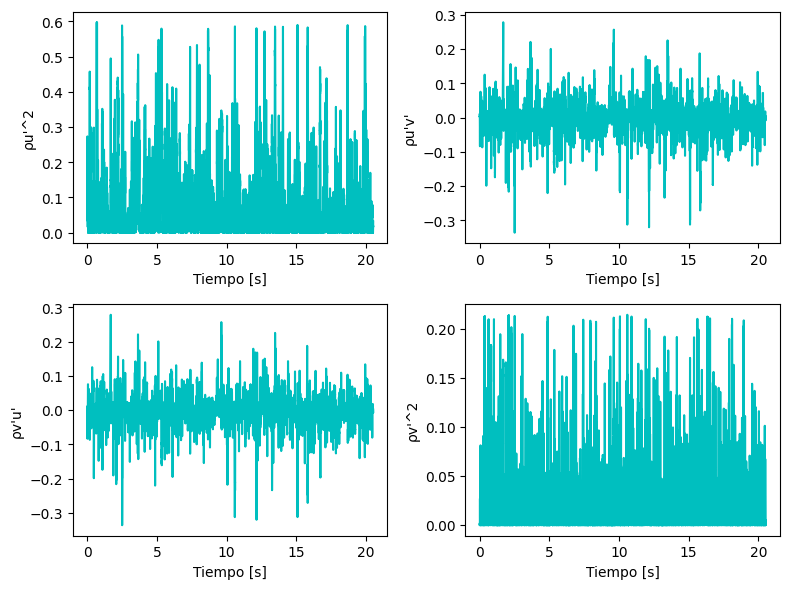

In [41]:
fig,axis=plt.subplots(2,2, figsize=(8,6))

plt.sca(axis[0][0])
plt.plot(t_,rho*u_prima**2,color='c',)
plt.xlabel('Tiempo [s]')
plt.ylabel("ρu'^2")

plt.sca(axis[0][1])
plt.plot(t_,rho*u_prima*v_prima,color='c',)
plt.xlabel('Tiempo [s]')
plt.ylabel("ρu'v'")

plt.sca(axis[1][1])
plt.plot(t_,rho*v_prima**2,color='c',)
plt.xlabel('Tiempo [s]')
plt.ylabel("ρv'^2")

plt.sca(axis[1][0])
plt.plot(t_,rho*v_prima*u_prima,color='c',)
plt.xlabel('Tiempo [s]')
plt.ylabel("ρv'u'")

plt.tight_layout()
plt.show()

## Espectros de Energía

### En zona cercana a la pared 1

In [15]:
u_mean_near1 = np.mean(u[0], axis=0)
v_mean_near1 = np.mean(v[0], axis=0)
vel_mean_near1=np.linalg.norm((u_mean_near1, v_mean_near1), axis=0)

F_near1=vel_mean_near1
N_near1=len(F_near1)

fhdt_near1=np.fft.fft(F_near1,N_near1)
psd_near1=fhdt_near1*np.conj(fhdt_near1)/N_near1
freq_near1=(1/dt)*np.arange(N_near1)
l_near1=np.arange(0,np.floor(N_near1/2),dtype='int')

### En zona cercana a la pared 2

In [16]:
u_mean_near2 = np.mean(u[115], axis=0)
v_mean_near2 = np.mean(v[115], axis=0)
vel_mean_near2=np.linalg.norm((u_mean_near2, v_mean_near2), axis=0)

F_near2=vel_mean_near2
N_near2=len(F_near2)

fhdt_near2=np.fft.fft(F_near2,N_near2)
psd_near2=fhdt_near2*np.conj(fhdt_near2)/N_near2
freq_near2=(1/dt)*np.arange(N_near2)
l_near2=np.arange(0,np.floor(N_near2/2),dtype='int')

### En el centro de la tubería

In [17]:
u_mean_center = np.mean(u[57], axis=0)
v_mean_center = np.mean(v[57], axis=0)
vel_mean_center=np.linalg.norm((u_mean_center, v_mean_center), axis=0)

F_center=vel_mean_center
N_center=len(F_center)

fhdt_center=np.fft.fft(F_center,N_center)
psd_center=fhdt_center*np.conj(fhdt_center)/N_center
freq_center=(1/dt)*np.arange(N_center)
l_center=np.arange(0,np.floor(N_center/2),dtype='int')

### En una posición intermedia

In [18]:
u_mean_inter = np.mean(u[27], axis=0)
v_mean_inter = np.mean(v[27], axis=0)
vel_mean_inter=np.linalg.norm((u_mean_inter, v_mean_inter), axis=0)

F_inter=vel_mean_inter
N_inter=len(F_inter)

fhdt_inter=np.fft.fft(F_inter,N_inter)
psd_inter=fhdt_inter*np.conj(fhdt_inter)/N_inter
freq_inter=(1/dt)*np.arange(N_inter)
l_inter=np.arange(0,np.floor(N_inter/2),dtype='int')

### Comparación de espectros

c:\Users\pcarr\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


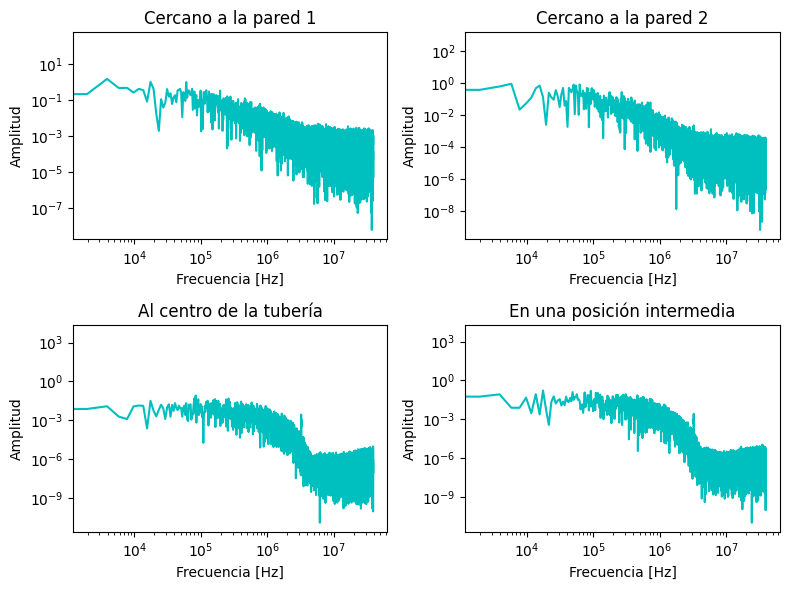

In [36]:
fig,axis=plt.subplots(2,2, figsize=(8,6))

plt.sca(axis[0][0])
plt.plot(freq_near1[l_near1],psd_near1[l_near1],color='c',)
plt.title("Cercano a la pared 1")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xscale('log')
plt.yscale('log')

plt.sca(axis[0][1])
plt.plot(freq_near2[l_near2],psd_near2[l_near2],color='c',)
plt.title("Cercano a la pared 2")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xscale('log')
plt.yscale('log')

plt.sca(axis[1][0])
plt.plot(freq_center[l_center],psd_center[l_center],color='c',)
plt.title("Al centro de la tubería")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xscale('log')
plt.yscale('log')

plt.sca(axis[1][1])
plt.plot(freq_inter[l_inter],psd_inter[l_inter],color='c',)
plt.title("En una posición intermedia")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()